In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('Customers')

# Display the first few rows of the dataset
data.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

<p>    Email: Customer's email </p>
<p>    Address: Customer's address
<p>    Avatar: Customer's avatar color
<p>    Avg. Session Length: Average session length
<p>    Time on App: Time spent on the app
<p>    Time on Website: Time spent on the website
<p>    Length of Membership: How long the customer has been a member
<p>    Yearly Amount Spent: The amount of money the customer spends per year

<p>For our multiple linear regression, we could predict the Yearly Amount Spent using the numeric features Avg. Session Length, Time on App, Time on Website, and Length of Membership.

In [3]:
# Summary statistics
summary = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

summary, missing_values

(       Avg. Session Length  Time on App  Time on Website  \
 count           500.000000   500.000000       500.000000   
 mean             33.053194    12.052488        37.060445   
 std               0.992563     0.994216         1.010489   
 min              29.532429     8.508152        33.913847   
 25%              32.341822    11.388153        36.349257   
 50%              33.082008    11.983231        37.069367   
 75%              33.711985    12.753850        37.716432   
 max              36.139662    15.126994        40.005182   
 
        Length of Membership  Yearly Amount Spent  
 count            500.000000           500.000000  
 mean               3.533462           499.314038  
 std                0.999278            79.314782  
 min                0.269901           256.670582  
 25%                2.930450           445.038277  
 50%                3.533975           498.887875  
 75%                4.126502           549.313828  
 max                6.922689     

<p>    Avg. Session Length: The average session length ranges from about 29.53 to 36.14 with a mean of 33.05.
<p>    Time on App: The time spent on the app varies from 8.51 to 15.13 with an average of 12.05.
<p>    Time on Website: The time spent on the website ranges from 33.91 to 40.00 with a mean of 37.06.
<p>    Length of Membership: The length of membership varies from 0.27 to 6.92 with an average of 3.53.
<p>    Yearly Amount Spent: The yearly amount spent by customers ranges from 256.67 to 765.52 with an average of 499.31.

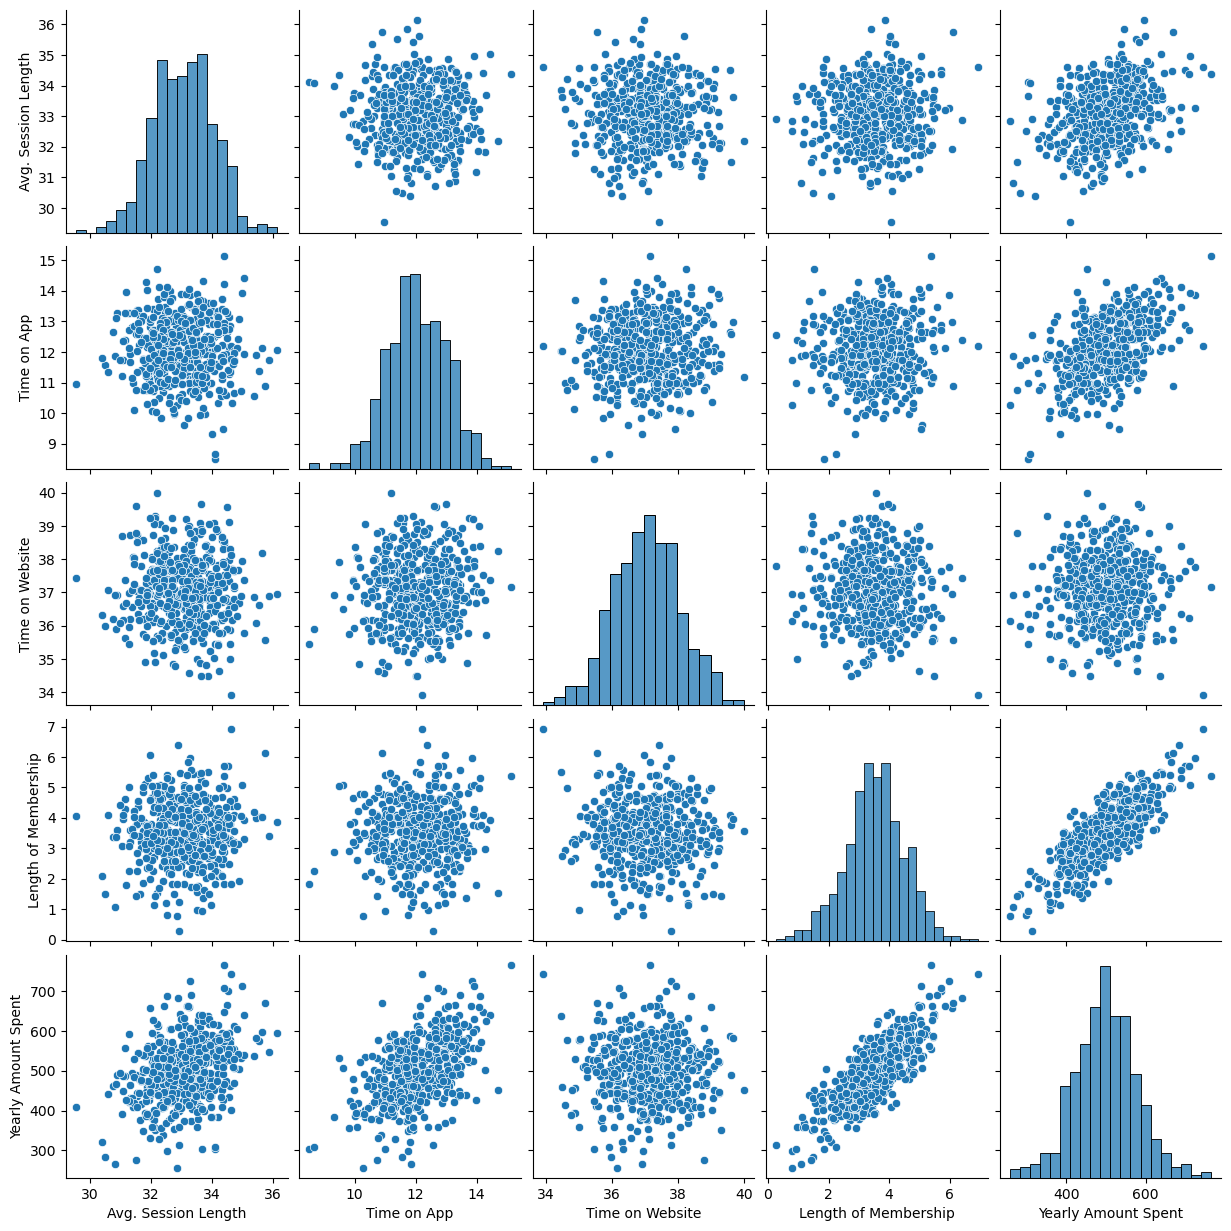

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot of the dataset
sns.pairplot(data)

plt.show()

<p>    The Yearly Amount Spent seems to have a strong positive correlation with Length of Membership. This is expected as customers who have been members for a longer time are likely to spend more.
<p>    Time on App also shows a positive correlation with Yearly Amount Spent, implying that customers who spend more time on the app also tend to spend more money yearly.
<p>    The relationships between other variables are less clear, with no obvious strong correlations observed.

In [48]:
from sklearn.model_selection import train_test_split

# Features and target
netflix = data[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = data['Yearly Amount Spent']



In [49]:
netflix

Avg. Session Length  Time on App  Time on Website  Length of Membership
0              34.497268    12.655651        39.577668              4.082621
1              31.926272    11.109461        37.268959              2.664034
2              33.000915    11.330278        37.110597              4.104543
3              34.305557    13.717514        36.721283              3.120179
4              33.330673    12.795189        37.536653              4.446308
..                   ...          ...              ...                   ...
495            33.237660    13.566160        36.417985              3.746573
496            34.702529    11.695736        37.190268              3.576526
497            32.646777    11.499409        38.332576              4.958264
498            33.322501    12.391423        36.840086              2.336485
499            33.715981    12.418808        35.771016              2.735160

[500 rows x 4 columns]

In [11]:
# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test.shape

(100, 4)

In [15]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error and the R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(109.8637411839406, 0.9778130629184125)

In [17]:
model.coef_

array([25.5962591 , 38.78534598,  0.31038593, 61.89682859])

In [18]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

The mean squared error (MSE) of our model on the test data is approximately 109.86, and the coefficient of determination (R² score) is approximately 0.978. This means that about 97.8% of the variance in the Yearly Amount Spent can be explained by our model, which is a pretty good result.

Finally, let's take a look at the coefficients of our model to see which features are most influential in predicting the Yearly Amount Spent.

In [19]:
# Get the coefficients of the linear regression model
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

coeff_df

Coefficient
Avg. Session Length     25.596259
Time on App             38.785346
Time on Website          0.310386
Length of Membership    61.896829

In [21]:
X.head()

Avg. Session Length  Time on App  Time on Website  Length of Membership
0            34.497268    12.655651        39.577668              4.082621
1            31.926272    11.109461        37.268959              2.664034
2            33.000915    11.330278        37.110597              4.104543
3            34.305557    13.717514        36.721283              3.120179
4            33.330673    12.795189        37.536653              4.446308

In [30]:
new_value = model.predict([[31.2,30.3,30,5]])

C:\Users\91756\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
new_value

array([1248.33757358])

In [44]:
my_value = model.predict([[40,30,39,7]])

C:\Users\91756\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:
my_value

array([1588.53618045])

In [40]:
y_pred

array([402.86230051, 542.53325708, 426.62011918, 501.91386363,
       409.6666551 , 569.92155038, 531.50423529, 505.94309188,
       408.10378607, 473.45942928, 441.18668812, 424.52463471,
       424.83341694, 527.12061508, 430.87985533, 423.47062047,
       575.8751518 , 484.6563331 , 457.77896975, 481.58742311,
       501.56110993, 513.12815188, 507.49166899, 646.63377343,
       449.70050586, 496.26290484, 556.18523776, 554.78684161,
       399.1582784 , 325.16921284, 532.62732659, 477.73025415,
       500.76491535, 305.09971374, 505.46811902, 483.52069444,
       519.09464122, 437.75549737, 456.25005245, 470.63517876,
       494.11207805, 444.65549239, 508.57079732, 500.88197484,
       488.35128728, 535.34025218, 594.58301773, 513.59474408,
       279.69877702, 432.71590835, 421.06976164, 480.94327496,
       584.59481888, 608.61734059, 564.42312991, 494.47224504,
       393.95593318, 456.11321352, 572.92228417, 499.27385693,
       512.42973545, 391.56170305, 479.60705887, 481.05

In [ ]:
y_test

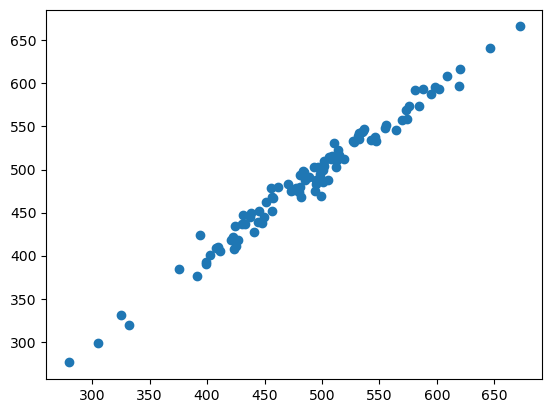

In [41]:
plt.scatter(y_pred,y_test)

In [53]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [51]:
y_pred

array([594.58301773, 380.28302202, 505.46811902, 570.40195587,
       592.01216316, 639.91471879, 517.59722994, 558.88480068,
       559.15753029, 441.18668812, 508.40197761, 513.59474408,
       398.87550949, 561.68315147, 460.50214232, 451.70869105,
       438.08150223, 411.18777447, 456.11321352, 596.35494206,
       535.3957652 , 420.90106741, 432.71590835, 504.09192012,
       703.90478098, 437.69137165, 609.116656  , 485.14985254,
       521.77372192, 572.30640929, 484.6563331 , 459.71091963,
       578.45435556, 488.35128728, 513.35977598, 517.05676199,
       349.37881313, 486.98174823, 479.56655387, 546.37716047,
       532.4884326 , 512.60316805, 578.19357391, 543.74827314,
       447.27875608, 551.15937046, 601.91418143, 563.10264851,
       473.15503116, 417.55405925, 726.13956698, 442.75240074,
       372.38317039, 456.97280992, 516.31885156, 494.47224504,
       523.79645873, 460.06663656, 481.67098285, 544.98992939,
       606.55437603, 500.8391971 , 622.17178705, 470.63